In [52]:
from qiskit import*
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state,array_to_latex


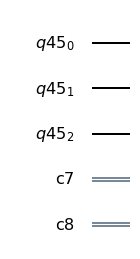

In [53]:
qr=QuantumRegister(3)#3 qubits are required
crz=ClassicalRegister(1)
crx=ClassicalRegister(1)
T_circuit=QuantumCircuit(qr,crz,crx)
%matplotlib inline
T_circuit.draw(output='mpl')

In [54]:
def create_bell_pair(qc,a,b):
    #create a bell pair using a and b in a circuit qc
    qc.h(a)
    qc.cx(a,b)#control gate with a as control bit and b as target bit
    


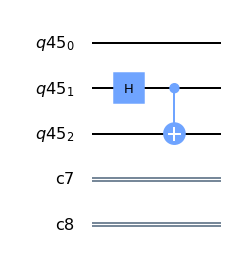

In [55]:

T_circuit.draw(output='mpl')

In [56]:
'''Now teleportaion to takes place 1 and 2 be seperate'''
#alice doing bell state measurement in on 0 and 1
def alice_gates(qc,a,b):
    qc.barrier()
    qc.cx(a,b)
    qc.h(a)
def measurement_and_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)#qubit a and classical 0
    qc.measure(b,1))

In [57]:
#BELL STATE MEASUREMENTS
alice_gates(T_circuit,0,1)
measurement_and_send(T_circuit,0,1)
T_circuit.draw(output='mpl')


#send through any channel used in classical computing 
#how we practically measure qubits and put in classical bits..?

#The result she obtains is always one of the four standard basis states  |00⟩,|01⟩,|10⟩,and |11⟩  with equal probability

'''On the basis of her measurement, Bob's state will be projected to,
|00⟩→(a|0⟩+b|1⟩)
|01⟩→(a|1⟩+b|0⟩)
|10⟩→(a|0⟩−b|1⟩)
|11⟩→(a|1⟩−b|0⟩)
'''

"On the basis of her measurement, Bob's state will be projected to,\n|00⟩→(a|0⟩+b|1⟩)\n|01⟩→(a|1⟩+b|0⟩)\n|10⟩→(a|0⟩−b|1⟩)\n|11⟩→(a|1⟩−b|0⟩)\n"

In [58]:
'''Bob, who already has the qubit  q2 , then applies the following gates depending on the state of the classical bits:

00  →  Do nothing

01  →  Apply  X  gate

10  →  Apply  Z  gate

11  →  Apply  ZX  gate'''

#bobs gate
def bobs_gate(qc,qubit,crz,crx):
    qc.barrier()
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

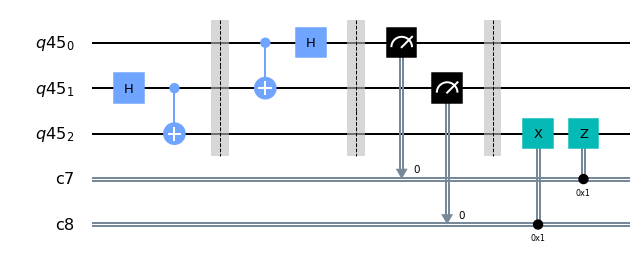

In [59]:
bobs_gate(T_circuit,2,crz,crx)
T_circuit.draw(output="mpl")

In [60]:
#Simulating the Teleportation Protocol 

#create random 1 qubit state 
psi=random_state(1)
#display it nicely
array_to_latex(psi,pretext='|\\psi\\rangle =')
#show it on a bloch sphere
#plot_bloch_multivector(psi)
#creating initializing gate--- this would create psi from q0 state
init_gate=Initialize(psi)
init_gate.label='init'

<IPython.core.display.Math object>

In [61]:
'''If the quantum teleportation circuit works, 
then at the end of the circuit the qubit  |q2⟩  will be in this state. 
We will check this using the statevector simulator.'''

'If the quantum teleportation circuit works, \nthen at the end of the circuit the qubit  |q2⟩  will be in this state. \nWe will check this using the statevector simulator.'

In [62]:
#Statevector Simulation

qc=QuantumCircuit(qr,crz,crx) # making teleportation circuit from begining
#initializing circuit 
qc.append(init_gate,[0])
qc.barrier()


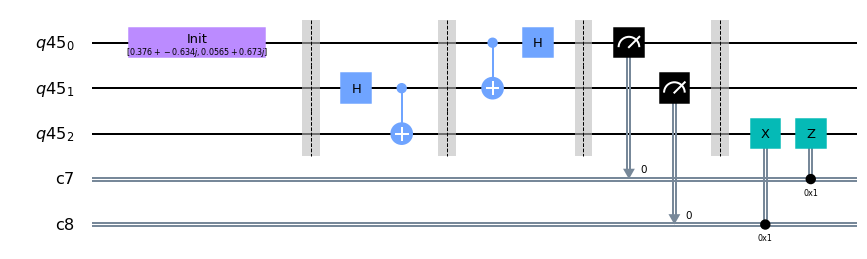

In [63]:
create_bell_pair(qc,1,2)
alice_gates(qc,0,1)
measurement_and_send(qc,0,1)
bobs_gate(qc,2,crz,crx)
qc.draw(output='mpl')

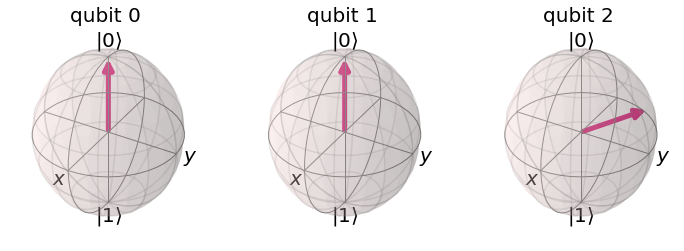

In [64]:
backend=BasicAer.get_backend('statevector_simulator')
out_vector=execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out_vector)

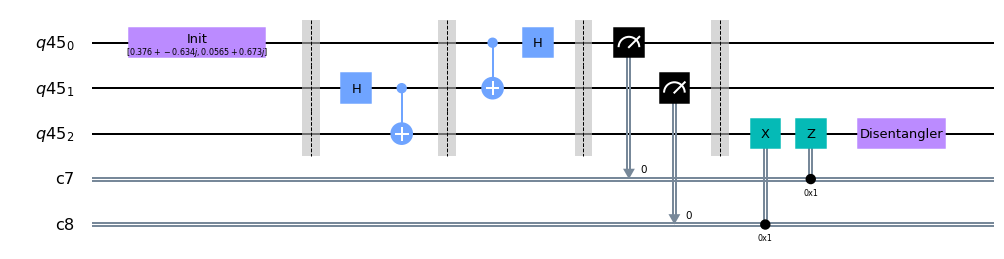

In [65]:
#Using Qasm simulator

inverse_init_gate=init_gate.gates_to_uncompute()
qc.append(inverse_init_gate,[2])
qc.draw(output='mpl')

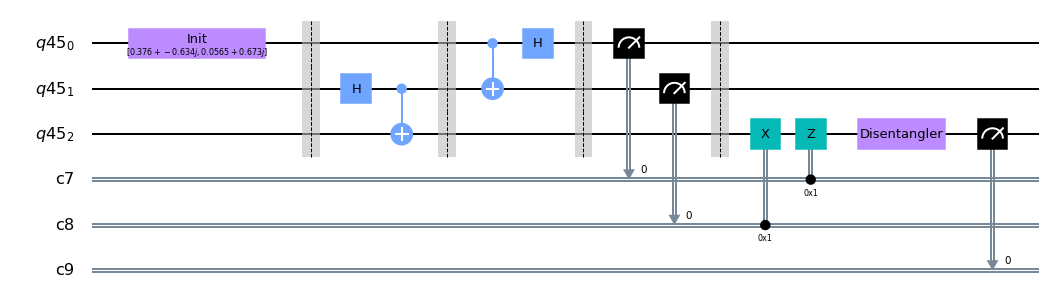

In [66]:
cr_result=ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw(output='mpl')

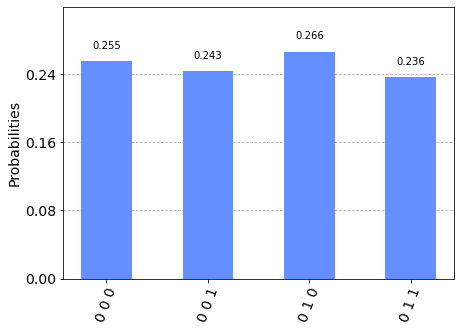

In [67]:
backend=BasicAer.get_backend('qasm_simulator')
counts=execute(qc,backend,shots=1024).result().get_counts()
plot_histogram(counts)

In [ ]:
#in every result q2 is in 0 state